In [ ]:
import cv2
import os
import glob
import gc
import numpy as np

def read_images(img_dir, xdim, ydim, nmax=5000):
  label = 0
  label_names = []
  x = []
  y = []
  for dirname in os.listdir(img_dir):
    print(dirname)
    label_names.append(dirname)
    data_path = os.path.join(img_dir + "/" + dirname, '*g')
    files = glob.glob(data_path)
    n=0
    for f1 in files:
      if n>nmax : break
      img = cv2.imread(f1) #reading the image in the directory.
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB color conversion
      img = cv2.resize(img, (xdim, ydim)) # resizing the image
      x.append(np.array(img)) # converting to an array and adding to the list of images
      y.append(label) # adding the image label to the list of tables
      n=n+1
    print(n, 'images read')
    label = label+1
  x = np.array(x)
  y = np.array(y)
  gc.collect() # memory retrieval
  return x,y, label, label_names




In [ ]:
x,y, Number_of_classes, Classes = read_images("/content/drive/MyDrive/dataset/images", 164, 164, 700)

INT_LIVINGROOM
701 images read
INT_STAIRS
701 images read
INT_COMPUTERLAB
701 images read
INT_BATHROOM
701 images read
EXT_FIELD
701 images read
EXT_FOREST
701 images read


In [ ]:
x

array([[[[  6,   5,   6],
         [  1,   1,   1],
         [  0,   0,   0],
         ...,
         [  9,   9,   9],
         [ 19,  17,  17],
         [ 12,  11,  10]],

        [[  7,   7,   7],
         [  4,   4,   4],
         [  0,   0,   0],
         ...,
         [ 18,  18,  17],
         [ 15,  14,  13],
         [ 23,  22,  20]],

        [[  6,   6,   5],
         [  6,   6,   6],
         [  1,   1,   1],
         ...,
         [ 18,  17,  15],
         [ 15,  15,  14],
         [ 29,  28,  26]],

        ...,

        [[ 60,  59,  57],
         [ 26,  27,  26],
         [ 25,  26,  25],
         ...,
         [216, 210, 202],
         [212, 206, 198],
         [209, 202, 195]],

        [[ 69,  68,  66],
         [ 12,  11,  12],
         [ 13,  12,  13],
         ...,
         [213, 207, 199],
         [209, 204, 195],
         [212, 206, 198]],

        [[ 53,  52,  50],
         [ 10,  10,  10],
         [ 12,  12,  12],
         ...,
         [213, 208, 198],
        

In [ ]:
y

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
Number_of_classes

6

In [ ]:
Classes

['INT_LIVINGROOM',
 'INT_STAIRS',
 'INT_COMPUTERLAB',
 'INT_BATHROOM',
 'EXT_FIELD',
 'EXT_FOREST']

display images using matplotlib and pyplot

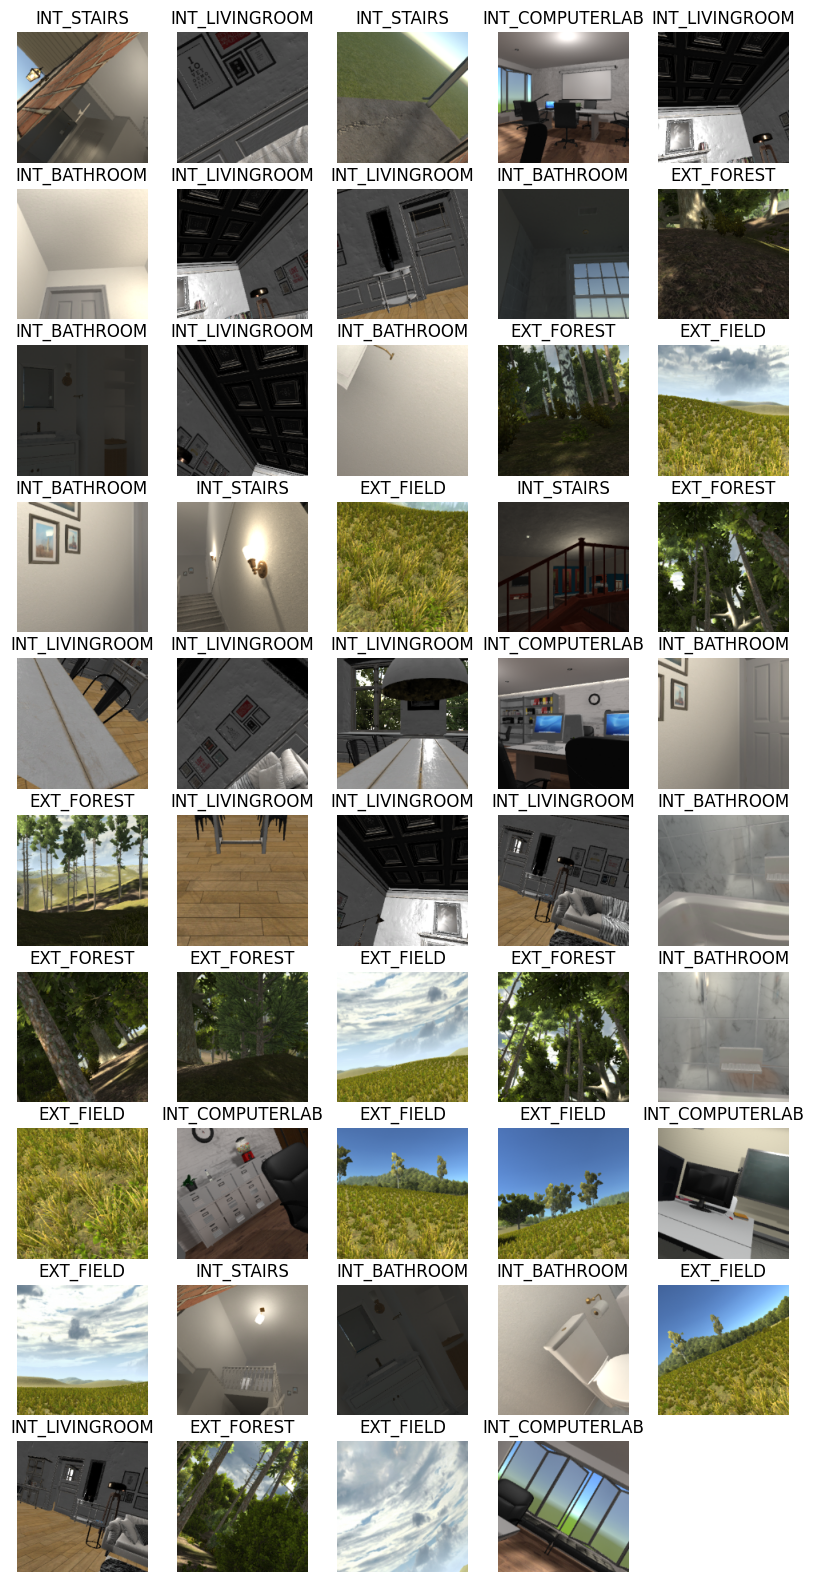

In [ ]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
for i in range(0,49):
  plt.subplot(10,5,i+1)
  j = random.randint(0,len(x))
  plt.axis('off')
  plt.imshow(x[j])
  plt.title(Classes[y[j]])

Data PreProcessing

In [ ]:
from keras.utils import to_categorical

# Your code here

y = to_categorical(y)


In [ ]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
x.shape

(4206, 164, 164, 3)

In [ ]:
# Normalisation between 0 and 1
x = x / 255
print(x[0][0])


[[0.02352941 0.01960784 0.02352941]
 [0.00392157 0.00392157 0.00392157]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.04705882 0.04705882 0.04313725]
 [0.10588235 0.10196078 0.09411765]
 [0.03921569 0.03921569 0.03529412]
 [0.03137255 0.02745098 0.03137255]
 [0.03137255 0.03137255 0.03137255]
 [0.03137255 0.03137255 0.03137255]
 [0.03529412 0.03529412 0.03529412]
 [0.03529412 0.03529412 0.03529412]
 [0.03137255 0.03137255 0.03137255]
 [0.03137255 0.03137255 0.03137255]
 [0.02352941 0.02745098 0.02352941]
 [0.08627451 0.08235294 0.07843137]
 [0.06666667 0.06666667 0.05882353]
 [0.07058824 0.07058824 0.06666667]
 [0.05490196 0.05098039 0.05098039]
 [0.05490196 0.05490196 0.05098039]
 [0.00392157 0.00392157 0.00392157]
 [0.         0.         0.        ]
 [0.01568627 0.01568627 0.01568627]
 [0.02352941 0.02352941 0.02352941]
 [0.         0.         0.        ]
 [0.04313725 0.03921569 0.03529412]
 [0.01960784 0.01960784 0.01960784]
 [0.         0.         0.  

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)


Delete X and Y to save space


In [ ]:
del x, y

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(164,164,3))
vgg16.trainable = False
for layer in vgg16.layers[15:]:
  layer.trainable=True
for layer in vgg16.layers[0:15]:
  layer.trainable=False
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Number_of_classes, activation='softmax'))
#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(164,164,3))
vgg16.trainable = False
for layer in vgg16.layers[15:]:
  layer.trainable=True
for layer in vgg16.layers[0:15]:
  layer.trainable=False
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Number_of_classes, activation='softmax'))
#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(164,164,3))
vgg16.trainable = False
for layer in vgg16.layers[15:]:
  layer.trainable=True
for layer in vgg16.layers[0:15]:
  layer.trainable=False
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Number_of_classes, activation='softmax'))
#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# Now you can use model.fit
train = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
119/119 [==============================] - 21s 115ms/step - loss: 0.3608 - accuracy: 0.8745 - val_loss: 0.1495 - val_accuracy: 0.9525
Epoch 2/10
119/119 [==============================] - 10s 82ms/step - loss: 0.0858 - accuracy: 0.9815 - val_loss: 0.0878 - val_accuracy: 0.9810
Epoch 3/10
119/119 [==============================] - 10s 84ms/step - loss: 0.0532 - accuracy: 0.9939 - val_loss: 0.0665 - val_accuracy: 0.9810
Epoch 4/10
119/119 [==============================] - 10s 85ms/step - loss: 0.0379 - accuracy: 0.9963 - val_loss: 0.0522 - val_accuracy: 0.9857
Epoch 5/10
119/119 [==============================] - 10s 86ms/step - loss: 0.0272 - accuracy: 0.9979 - val_loss: 0.0457 - val_accuracy: 0.9929
Epoch 6/10
119/119 [==============================] - 10s 84ms/step - loss: 0.0215 - accuracy: 0.9987 - val_loss: 0.0341 - val_accuracy: 0.9929
Epoch 7/10
119/119 [==============================] - 10s 86ms/step - loss: 0.0167 - accuracy: 0.9992 - val_loss: 0.0327 - val_accuracy

In [ ]:
def plot_scores(train):
  accuracy = train.history['accuracy']
  val_accuracy = train.history['val_accuracy']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'b', label='Score Training')
  plt.plot(epochs, val_accuracy, 'r', label='Score Validation')
  plt.title('Scores')
  plt.legend()
  plt.show()

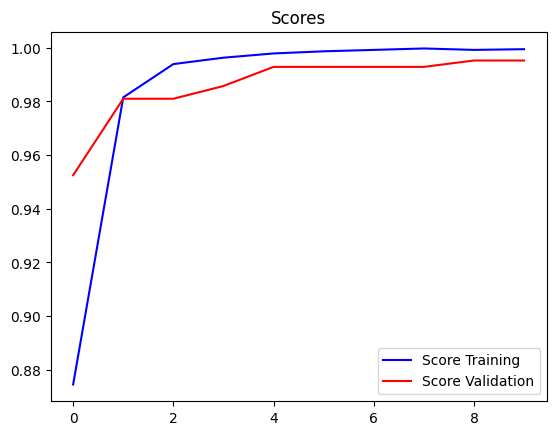

In [ ]:
plot_scores(train)

In [ ]:
# test
scores = model.evaluate(x_test, y_test, verbose=0)
print("score:%.2f%%" % (scores[1]*100))


score:99.52%


In [ ]:
#prediction
predict_y = model.predict(x_test)
y_cnn = np.argmax(predict_y,axis=1)

14/14 [==============================] - 1s 72ms/step


In [ ]:
x_real,y_real,Number_of_classes_real,Classes_real = read_images("/content/drive/MyDrive/dataset/imgsreal",164, 164,700)

1
597 images read
4
377 images read
3
583 images read
2
491 images read
5
596 images read
0
369 images read


In [ ]:
y_real

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
y_real.shape

(3013,)

In [ ]:
Number_of_classes_real

6

In [ ]:
Classes_real

['1', '4', '3', '2', '5', '0']

Display images using matplotlib and pyplot


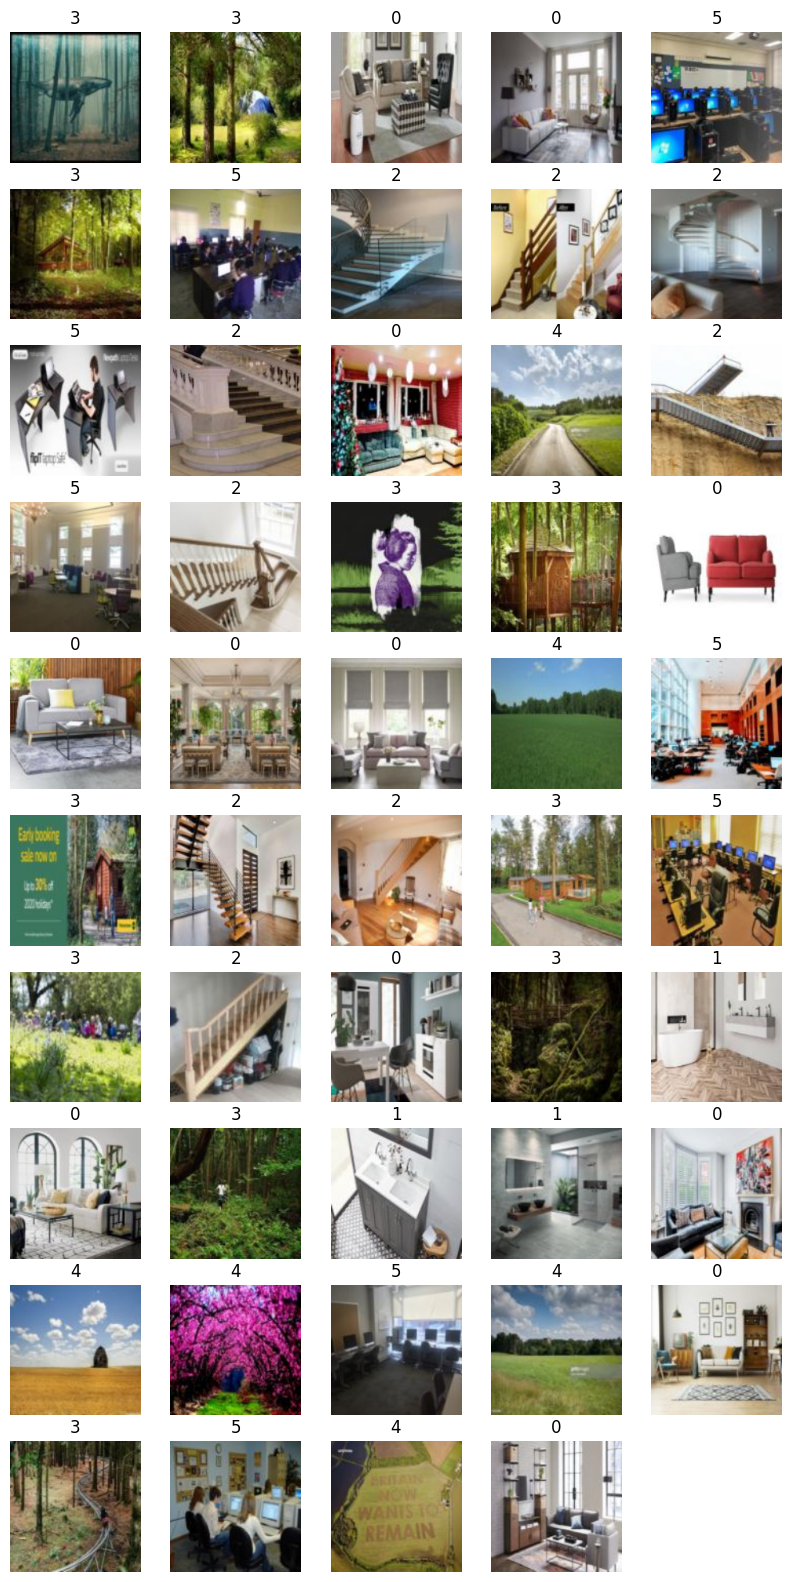

In [ ]:
import random
plt.figure(figsize=(10,20))

for i in range(0,49):
  plt.subplot(10,5,i+1)
  j = random.randint(0,len(x_real))
  plt.axis('off')
  plt.imshow(x_real[j])
  plt.title(Classes_real[y_real[j]])

Mapping of the read encoding

In [ ]:
for i in range(y_real.shape[0]):
  if y_real[i]==0:
    y_real[i]=0
  elif y_real[i]==1:
    y_real[i]=2
  elif y_real[i]==2:
    y_real[i]=5
  elif y_real[i]==3:
    y_real[i]=4
  elif y_real[i]==4:
    y_real[i]=3
  elif y_real[i]==5:
    y_real[i]=1

Data Preprocessing

In [ ]:
y_real = to_categorical(y_real)

In [ ]:
y_real

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#Normalisation between 0 and 1
x_real = x_real / 255
print(x_real[0][0])

[[0.42745098 0.38039216 0.41960784]
 [0.3372549  0.29019608 0.32941176]
 [0.30196078 0.25490196 0.29411765]
 [0.33333333 0.28627451 0.3254902 ]
 [0.41176471 0.36470588 0.40392157]
 [0.41568627 0.36862745 0.40784314]
 [0.40784314 0.36078431 0.4       ]
 [0.40392157 0.35686275 0.39607843]
 [0.40784314 0.36862745 0.40392157]
 [0.4        0.36078431 0.39607843]
 [0.38823529 0.34901961 0.38431373]
 [0.37647059 0.33333333 0.36862745]
 [0.36862745 0.33333333 0.36862745]
 [0.38431373 0.35686275 0.38823529]
 [0.36862745 0.34117647 0.37254902]
 [0.36078431 0.3372549  0.36470588]
 [0.34509804 0.3254902  0.35294118]
 [0.31764706 0.29803922 0.3254902 ]
 [0.2745098  0.25490196 0.28235294]
 [0.32156863 0.30196078 0.32941176]
 [0.35294118 0.32941176 0.35686275]
 [0.37647059 0.34901961 0.38039216]
 [0.40392157 0.37647059 0.40784314]
 [0.40784314 0.38039216 0.41176471]
 [0.40784314 0.38039216 0.41568627]
 [0.41568627 0.38823529 0.42352941]
 [0.42352941 0.39607843 0.42745098]
 [0.40784314 0.38039216 0.41

Test on without training

In [ ]:
# test
scores = model.evaluate(x_real, y_real, verbose=0)
print("score:%.2f%%" %(scores[1]*100))

score:10.26%


Model Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_real, y_real, test_size=0.1, random_state=1)

Train Model

In [ ]:
#train
train = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, verbose=1)

Epoch 1/30
85/85 [==============================] - 15s 182ms/step - loss: 1.5927 - accuracy: 0.7053 - val_loss: 1.0501 - val_accuracy: 0.7715
Epoch 2/30
85/85 [==============================] - 8s 95ms/step - loss: 0.2666 - accuracy: 0.9188 - val_loss: 0.5422 - val_accuracy: 0.8576
Epoch 3/30
85/85 [==============================] - 8s 89ms/step - loss: 0.1044 - accuracy: 0.9650 - val_loss: 0.5089 - val_accuracy: 0.8411
Epoch 4/30
85/85 [==============================] - 8s 96ms/step - loss: 0.0545 - accuracy: 0.9864 - val_loss: 0.4626 - val_accuracy: 0.8609
Epoch 5/30
85/85 [==============================] - 7s 87ms/step - loss: 0.0344 - accuracy: 0.9930 - val_loss: 0.4580 - val_accuracy: 0.8775
Epoch 6/30
85/85 [==============================] - 7s 88ms/step - loss: 0.0253 - accuracy: 0.9974 - val_loss: 0.4586 - val_accuracy: 0.8709
Epoch 7/30
85/85 [==============================] - 7s 86ms/step - loss: 0.0188 - accuracy: 0.9985 - val_loss: 0.4780 - val_accuracy: 0.8642
Epoch 8/30


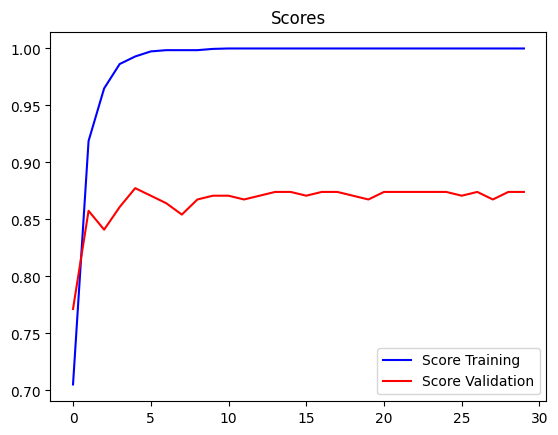

In [ ]:
plot_scores(train)

Testing and Prediction

In [ ]:
#test
scores = model.evaluate(x_test, y_test, verbose=0)
print("score:%.2f%%" % (scores[1]*100))

score:87.42%


In [ ]:
#prediction
predict_y = model.predict(x_test)
y_cnn = np.argmax(predict_y, axis=1)

10/10 [==============================] - 1s 73ms/step


In [ ]:
model.save('model3.h5')